# Assignment 1

SEOYEON CHOI  
9/19/22

교수님 풀이, 안 건들임

-   제출은 `이름(학번).ipynb` 파일과 `이름(학번).html`파일 2개를 제출할
    것.
-   ipynb 혹은 html 파일을 이용한 제출이 익숙하지 않은 학생은 질문할 것.

In [ ]:
from fastai.vision.all import *
from fastai.collab import * 
from fastai.text.all import *

## `1`. 이미지자료분석

아래를 이용하여 MNIST_SAMPLE 이미지 자료를 다운로드 받고 dls오브젝트를
만들어라.

In [ ]:
path = untar_data(URLs.MNIST_SAMPLE)

In [ ]:
dls = ImageDataLoaders.from_folder(path,suffle=False) 

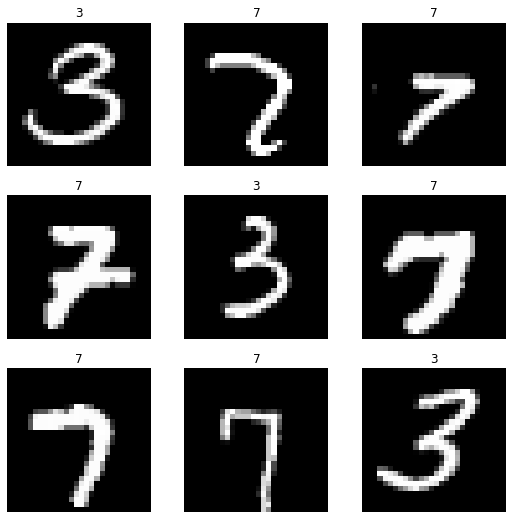

In [ ]:
dls.show_batch()

`(1)` cnn_learner를 이용하여 lrnr 오브젝트를 생성하라. - arch 는
resnet34 로 설정할 것 - metrics 는 error_rate 로 설정할 것

(풀이)

In [ ]:
lrnr = cnn_learner(dls, arch = resnet34, metrics=error_rate)

/home/cgb4/anaconda3/envs/py37/lib/python3.7/site-packages/fastai/vision/learner.py:284: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/home/cgb4/anaconda3/envs/py37/lib/python3.7/site-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/home/cgb4/anaconda3/envs/py37/lib/python3.7/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)

`(2)` fine_tune 을 이용하여 lrnr 오브젝트를 학습하라.

(풀이)

In [ ]:
lrnr.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.282870,0.150136,0.049068,00:05


epoch,train_loss,valid_loss,error_rate,time
0,0.042991,0.017522,0.006379,00:05


`(3)` 아래를 이용하여 X,y를 만들어라.

``` python
X,y = dls.one_batch()
```

X,y의 shape을 조사하라. X에는 몇개의 이미지가 있는가? 이미지의 size는
얼마인가?

(풀이)

In [ ]:
X,y = dls.one_batch()
X.shape

torch.Size([64, 3, 28, 28])

X에는 64개의 이미지가 있고 크기는 (28,28) 이다.

`(4)` 아래의 코드를 이용하여 X의 두번째 이미지가 어떠한 숫자를
의미하는지 확인하라. (그림보고 3인지 7인지 확인하여 답을 쓸 것)

``` python
show_image(X[0])
```

그리고 show_image가 정의된 파일의 경로를 확인하고 show_image가 python
내장함수 인지, torch에서 지원하는 함수인지 fastai에서 지원하는 함수인지
파악하라.

(풀이)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

<AxesSubplot:>

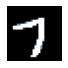

In [ ]:
show_image(X[1]) # 두번째 이미지 

In [ ]:
show_image?

Signature: 
show_image ( 
 im , 
 ax = None , 
 figsize = None , 
 title = None , 
 ctx = None , 
 cmap = None , 
 norm = None , 
 * , 
 aspect = None , 
 interpolation = None , 
 alpha = None , 
 vmin = None , 
 vmax = None , 
 origin = None , 
 extent = None , 
 interpolation_stage = None , 
 filternorm = True , 
 filterrad = 4.0 , 
 resample = None , 
 url = None , 
 data = None , 
 ** kwargs , 
 ) 
 Docstring: Show a PIL or PyTorch image on `ax`.
 File: ~/anaconda3/envs/py37/lib/python3.7/site-packages/fastai/torch_core.py
 Type: function

-   fastai에서 지원하는 함수

`(5)` lrnr 오브젝트를 이용하여 AI가 X\[0\]을 어떤 값으로 판단하는지
확인하라. 올바르게 판단하였는가? 올바르게 판단했다면 몇 프로의 확신으로
판단하였는가? \<– 문제가 의도한 것과 다르게 만들어졌어요

(풀이)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

<AxesSubplot:>

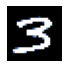

In [ ]:
show_image(X[0]) # 첫번째 이미지

In [ ]:
lrnr.model(X[0].reshape(1,3,28,28))

TensorBase([[ 3.4148, -5.0356]], device='cuda:0', grad_fn=<AliasBackward0>)

In [ ]:
import numpy as np
a=np.exp(3.4148)
b=np.exp(-5.0356)
print('3일확률',a/(a+b))
print('7일확률',b/(a+b))

3일확률 0.9997862308347155
7일확률 0.0002137691652844868

> 원래문제의도: `lrnr.predict(X[0].to("cpu"))`

## `2`. 추천시스템

아래를 이용하여 rcmd_anal.csv 를 다운로드 받고 dls오브젝트를 만들어라.

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/DL2022/master/_notebooks/2022-09-08-rcmd_anal.csv')
df

,user,item,rating,item_name
0,1,15,1.084308,홍차5
1,1,1,4.149209,커피1
2,1,11,1.142659,홍차1
3,1,5,4.033415,커피5
4,1,4,4.078139,커피4
...,...,...,...,...
995,100,18,4.104276,홍차8
996,100,17,4.164773,홍차7
997,100,14,4.026915,홍차4
998,100,4,0.838720,커피4


`(1)` 73번 유저가 먹은 아이템 및 평점을 출력하는 코드를 작성하라. 이를
기반으로 73번 유저가 어떠한 취향인지 파악하라.

(풀이)

In [ ]:
df.query('user == 73')

,user,item,rating,item_name
720,73,20,3.733853,홍차10
721,73,18,3.975004,홍차8
722,73,9,1.119541,커피9
723,73,13,3.840801,홍차3
724,73,2,0.943742,커피2
725,73,4,1.152405,커피4
726,73,1,0.887292,커피1
727,73,7,0.947641,커피7
728,73,6,0.868370,커피6
729,73,17,3.873590,홍차7


-   홍차를 선호

`(2)` dls와 lrnr 오브젝트를 생성하고 lrnr 오브젝트를 학습하라.

(풀이)

In [ ]:
dls = CollabDataLoaders.from_df(df)
lrnr = collab_learner(dls,y_range=(0,5))

In [ ]:
lrnr.fit(50)

epoch,train_loss,valid_loss,time
0,2.337114,2.258755,00:00
1,2.328897,2.254714,00:00
2,2.320246,2.237874,00:00
3,2.300545,2.191783,00:00
4,2.265857,2.104007,00:00
5,2.207397,1.966761,00:00
6,2.123599,1.783263,00:00
7,2.008980,1.562448,00:00
8,1.865242,1.317642,00:00
9,1.697832,1.068948,00:00


`(3)` 아래와 같은 데이터 프레임을 생성하고 df_new 에 저장하라.

In [ ]:
#collapse
import IPython 
_html='<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>user</th>\n      <th>item</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>73</td>\n      <td>1</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>73</td>\n      <td>2</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>73</td>\n      <td>3</td>\n    </tr>\n    <tr>\n      <th>3</th>\n      <td>73</td>\n      <td>4</td>\n    </tr>\n    <tr>\n      <th>4</th>\n      <td>73</td>\n      <td>5</td>\n    </tr>\n    <tr>\n      <th>5</th>\n      <td>73</td>\n      <td>6</td>\n    </tr>\n    <tr>\n      <th>6</th>\n      <td>73</td>\n      <td>7</td>\n    </tr>\n    <tr>\n      <th>7</th>\n      <td>73</td>\n      <td>8</td>\n    </tr>\n    <tr>\n      <th>8</th>\n      <td>73</td>\n      <td>9</td>\n    </tr>\n    <tr>\n      <th>9</th>\n      <td>73</td>\n      <td>10</td>\n    </tr>\n    <tr>\n      <th>10</th>\n      <td>73</td>\n      <td>11</td>\n    </tr>\n    <tr>\n      <th>11</th>\n      <td>73</td>\n      <td>12</td>\n    </tr>\n    <tr>\n      <th>12</th>\n      <td>73</td>\n      <td>13</td>\n    </tr>\n    <tr>\n      <th>13</th>\n      <td>73</td>\n      <td>14</td>\n    </tr>\n    <tr>\n      <th>14</th>\n      <td>73</td>\n      <td>15</td>\n    </tr>\n    <tr>\n      <th>15</th>\n      <td>73</td>\n      <td>16</td>\n    </tr>\n    <tr>\n      <th>16</th>\n      <td>73</td>\n      <td>17</td>\n    </tr>\n    <tr>\n      <th>17</th>\n      <td>73</td>\n      <td>18</td>\n    </tr>\n    <tr>\n      <th>18</th>\n      <td>73</td>\n      <td>19</td>\n    </tr>\n    <tr>\n      <th>19</th>\n      <td>73</td>\n      <td>20</td>\n    </tr>\n  </tbody>\n</table>'
IPython.display.HTML(_html)

,user,item
0,73,1
1,73,2
2,73,3
3,73,4
4,73,5
5,73,6
6,73,7
7,73,8
8,73,9
9,73,10


(풀이)

In [ ]:
df_new=pd.DataFrame({'user':[73]*20,'item':range(1,21)})
df_new

,user,item
0,73,1
1,73,2
2,73,3
3,73,4
4,73,5
5,73,6
6,73,7
7,73,8
8,73,9
9,73,10


`(4)` 아래의 코드를 이용하여 73번 유저의 취향을 파악하라. 73번 유저가
커피3, 커피5를 먹는다면 얼마정도의 평점을 줄 것이라 예측되는가?

``` python
_dl = dls.test_dl(df_new)
lrnr.get_preds(dl=_dl)
```

(풀이)

In [ ]:
_dl = dls.test_dl(df_new)
lrnr.get_preds(dl=_dl)

(tensor([0.9698, 1.0314, 1.0191, 1.0177, 1.0122, 0.9323, 1.0513, 1.0184, 1.0316,
         0.9842, 3.8255, 3.9591, 3.8640, 3.8937, 3.9437, 3.8947, 3.8272, 3.9503,
         3.8117, 3.8603]),
 None)

-   커피3: 1.0191, 커피5: 1.0122

## `3`. 시퀀스자료분석

아래를 이용하여 자료를 다운로드 받아라.

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/DL2022/master/_notebooks/2022-09-19-human_numbers_100.csv')
df

,Unnamed: 0,text
0,0,"one, two, three, four, five, six, seven, eight, nine, ten, eleven, twelve, thirteen, fourteen, fifteen, sixteen, seventeen, eighteen, nineteen, twenty, twenty one, twenty two, twenty three, twenty four, twenty five, twenty six, twenty seven, twenty eight, twenty nine, thirty, thirty one, thirty two, thirty three, thirty four, thirty five, thirty six, thirty seven, thirty eight, thirty nine, forty, forty one, forty two, forty three, forty four, forty five, forty six, forty seven, forty eight, forty nine, fifty, fifty one, fifty two, fifty three, fifty four, fifty five, fifty six, fifty seve..."
1,1,"one, two, three, four, five, six, seven, eight, nine, ten, eleven, twelve, thirteen, fourteen, fifteen, sixteen, seventeen, eighteen, nineteen, twenty, twenty one, twenty two, twenty three, twenty four, twenty five, twenty six, twenty seven, twenty eight, twenty nine, thirty, thirty one, thirty two, thirty three, thirty four, thirty five, thirty six, thirty seven, thirty eight, thirty nine, forty, forty one, forty two, forty three, forty four, forty five, forty six, forty seven, forty eight, forty nine, fifty, fifty one, fifty two, fifty three, fifty four, fifty five, fifty six, fifty seve..."
2,2,"one, two, three, four, five, six, seven, eight, nine, ten, eleven, twelve, thirteen, fourteen, fifteen, sixteen, seventeen, eighteen, nineteen, twenty, twenty one, twenty two, twenty three, twenty four, twenty five, twenty six, twenty seven, twenty eight, twenty nine, thirty, thirty one, thirty two, thirty three, thirty four, thirty five, thirty six, thirty seven, thirty eight, thirty nine, forty, forty one, forty two, forty three, forty four, forty five, forty six, forty seven, forty eight, forty nine, fifty, fifty one, fifty two, fifty three, fifty four, fifty five, fifty six, fifty seve..."
3,3,"one, two, three, four, five, six, seven, eight, nine, ten, eleven, twelve, thirteen, fourteen, fifteen, sixteen, seventeen, eighteen, nineteen, twenty, twenty one, twenty two, twenty three, twenty four, twenty five, twenty six, twenty seven, twenty eight, twenty nine, thirty, thirty one, thirty two, thirty three, thirty four, thirty five, thirty six, thirty seven, thirty eight, thirty nine, forty, forty one, forty two, forty three, forty four, forty five, forty six, forty seven, forty eight, forty nine, fifty, fifty one, fifty two, fifty three, fifty four, fifty five, fifty six, fifty seve..."
4,4,"one, two, three, four, five, six, seven, eight, nine, ten, eleven, twelve, thirteen, fourteen, fifteen, sixteen, seventeen, eighteen, nineteen, twenty, twenty one, twenty two, twenty three, twenty four, twenty five, twenty six, twenty seven, twenty eight, twenty nine, thirty, thirty one, thirty two, thirty three, thirty four, thirty five, thirty six, thirty seven, thirty eight, thirty nine, forty, forty one, forty two, forty three, forty four, forty five, forty six, forty seven, forty eight, forty nine, fifty, fifty one, fifty two, fifty three, fifty four, fifty five, fifty six, fifty seve..."
...,...,...
1995,1995,"one, two, three, four, five, six, seven, eight, nine, ten, eleven, twelve, thirteen, fourteen, fifteen, sixteen, seventeen, eighteen, nineteen, twenty, twenty one, twenty two, twenty three, twenty four, twenty five, twenty six, twenty seven, twenty eight, twenty nine, thirty, thirty one, thirty two, thirty three, thirty four, thirty five, thirty six, thirty seven, thirty eight, thirty nine, forty, forty one, forty two, forty three, forty four, forty five, forty six, forty seven, forty eight, forty nine, fifty, fifty one, fifty two, fifty three, fifty four, fifty five, fifty six, fifty seve..."
1996,1996,"one, two, three, four, five, six, seven, eight, nine, ten, eleven, twelve, thirteen, fourteen, fifteen, sixteen, seventeen, eighteen, nineteen, twenty, twenty one, twenty two, twenty three, twenty four, twenty five, twenty six, twenty seven, twenty eight, twenty nine, thirty, thirty one, thirty two, thirty three, thi

`(1)` TextDataLoaders.from_df을 이용하여 dls오브젝트를 만들어라. - is_lm
= True 로 설정할 것 - seq_len = 5 로 설정할 것

(풀이)

In [ ]:
dls = TextDataLoaders.from_df(df,is_lm=True,seq_len=5,text_col='text')
dls.show_batch()

,text,text_
0,"xxbos one , two ,","one , two , three"
1,"hundred xxbos one , two","xxbos one , two ,"
2,"one hundred xxbos one ,","hundred xxbos one , two"
3,", one hundred xxbos one","one hundred xxbos one ,"
4,"nine , one hundred xxbos",", one hundred xxbos one"
5,"ninety nine , one hundred","nine , one hundred xxbos"
6,", ninety nine , one","ninety nine , one hundred"
7,"eight , ninety nine ,",", ninety nine , one"
8,"ninety eight , ninety nine","eight , ninety nine ,"


`(2)` lrnr 오브젝트를 만들어라. - arch = AWD_LSTM 이용 - metrics =
accuracy 이용

(풀이)

In [ ]:
lrnr = language_model_learner(dls, arch= AWD_LSTM, metrics=accuracy)

`(3)` lrnr오브젝트에서 fine_tune(3) 메소드를 이용하여 모형을 학습하라.

(풀이)

In [ ]:
lrnr.fine_tune(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.534681,0.168856,0.977650,00:49


epoch,train_loss,valid_loss,accuracy,time
0,0.018749,0.003256,0.999205,00:54
1,0.001580,0.002430,0.999324,00:54
2,0.000651,0.002244,0.999315,00:54


`(4)` ‘one , two ,’ 이후에 이어질 50개의 단어를 생성하라.

(풀이)

In [ ]:
lrnr.predict('one, two,', n_words=50) 

'one , two , three , four , five , six , seven , eight , nine , ten , eleven , twelve , thirteen , fourteen , fifteen , sixteen , seventeen , eighteen , nineteen , twenty , twenty one , twenty two , twenty three , twenty four , twenty five'

`(5)` ‘twenty , twenty one ,’ 이후에 이어질 50개의 단어를 생성하라.

(풀이)

In [ ]:
lrnr.predict('twenty, twenty one,', n_words=50) 

'twenty , twenty one , twenty two , twenty three , twenty four , twenty five , twenty six , twenty seven , twenty eight , twenty nine , thirty , thirty one , thirty two , thirty three , thirty four , thirty five , thirty six , thirty seven , thirty eight ,'

## `4`. 리눅스명령어

Collab 에서 (혹은 리눅스기반 서버에서) 아래의 명령어를 순서대로
실행해보라.

    !ls
    !ls -a 
    !ls .
    !ls .. 
    !ls sample
    !mkdir asdf 
    !wget https://raw.githubusercontent.com/guebin/DL2022/master/_notebooks/2022-09-08-rcmd_anal.csv
    !cp 2022-09-08-rcmd_anal.csv ./asdf 
    !ls ./asdf 
    !rm 2022-09-08-rcmd_anal.csv 
    !rm -rf asdf 

각 명령들이 무엇을 의미하는지 간단히 서술하라.

(풀이)

`!ls` - 현재디렉토리 파일+폴더 출력 - !ls . 와 같음 - !ls ./ 와 같음

`!ls -a` - 현재디렉토리 파일+폴더 출력, 숨겨진 항목까지 출력

`!ls .` - 현재디렉토리 파일+폴더 출력 - !ls 와 같음 - !ls ./ 와 같음

`!ls ..` - 현재디렉토리보다 상위디렉토리의 파일+폴더 출력

`!ls sample` - 현재디렉토리에 sample 디렉토리 출력 - !ls ./sample 과
같음

`!mkdir asdf` - 현재디렉토리에 asdf 폴더 생성 - !mkdir ./asdf 와 같음

`!wget https://raw.githubusercontent.com/guebin/DL2022/master/_notebooks/2022-09-08-rcmd_anal.csv` -
url에 있는 파일 다운로드하여 현재디렉토리에 저장

`!cp 2022-09-08-rcmd_anal.csv ./asdf` - 2022-09-08-rcmd_anal.csv 파일을
./asdf 로 복사

`!ls ./asdf` - 현재디렉토리에서 asdf 디렉토리의 내용출력 - !ls asdf 와
같음

`!rm 2022-09-08-rcmd_anal.csv` - 현재 디렉토리에서
2022-09-08-rcmd_anal.csv 파일삭제; - rm ./2022-09-08-rcmd_anal.csv 와
같음

`!rm -rf asdf` - 현재 디렉토리에서 asdf 삭제 (asdf 폴더내에 파일이
존재하면 파일도 같이 삭제) - r은 recursively, f는 force의 약자

## Appendix: ipynb -\> html 변환

> youtube:
> https://youtube.com/playlist?list=PLQqh36zP38-x3HQLeyrS7GLh70Dv_54Yg